In [74]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
#import datetime
import scipy.ndimage as ndimage
from matplotlib import cm
import geopy.distance
#import matplotlib as mpl
from scipy.interpolate import interp1d
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import leafmap
import plotly.express as px
import matplotlib as mpl
import xarray as xr
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.stats import gaussian_kde
from matplotlib.lines import Line2D
#import pysplit

In [3]:
# Specify the CSV file path
csv_file_path = 'C:/Users/taiwoajayi/Documents/Lab4/Data/WhiteReference_DigitalNumber_ASD.txt'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, sep = '\s+')

# Display the DataFrame
df


,Wavelength,REM49059000001.asd
0,350,66.307648
1,351,73.309680
2,352,80.120607
3,353,87.254609
4,354,94.991603
...,...,...
2146,2496,265.849207
2147,2497,268.055080
2148,2498,255.687249
2149,2499,241.426317


In [15]:
# Specify the CSV file path
csv_file_path1 = 'C:/Users/taiwoajayi/Documents/Lab4/Data/Leaf_WhiteReference_AbsoluteIrradiance_OO.txt'

# Read the CSV file into a pandas DataFrame
df2 = pd.read_csv(csv_file_path1, sep = '\s+', skiprows=13, header = None)
# Set column names
df2.columns = ['Wavelength', 'Irradiance']
# Display the DataFrame
df2

,Wavelength,Irradiance
0,340.355,0.000000
1,340.733,0.000000
2,341.111,0.000000
3,341.488,-0.000000
4,341.866,0.000000
...,...,...
2043,1019.050,3.197936
2044,1019.331,6.473130
2045,1019.612,1.983029
2046,1019.892,1.983650


In [16]:
# Specify the CSV file path
csv_file_path2 = 'C:/Users/taiwoajayi/Documents/Lab4/Data/Leaf_LightGreen_DigitalNumber_ASD.txt'

# Read the CSV file into a pandas DataFrame
df3 = pd.read_csv(csv_file_path2, sep = '\s+')
# Set column names
#df2.columns = ['Wavelength', 'Irradiance']
# Display the DataFrame
df3

,Wavelength,REM49059000003.asd
0,350,1.537570
1,351,2.121731
2,352,1.629012
3,353,2.080589
4,354,1.988286
...,...,...
2146,2496,-2.714540
2147,2497,15.391996
2148,2498,17.195431
2149,2499,-5.083720


In [17]:
# Specify the CSV file path
csv_file_path3 = 'C:/Users/taiwoajayi/Documents/Lab4/Data/Leaf_DeepGreen_DigitalNumber_ASD.txt'

# Read the CSV file into a pandas DataFrame
df4 = pd.read_csv(csv_file_path3, sep = '\s+')
# Set column names
#df2.columns = ['Wavelength', 'Irradiance']
# Display the DataFrame
df4

,Wavelength,REM49059000002.asd
0,350,3.171583
1,351,3.996340
2,352,3.763063
3,353,4.012313
4,354,4.580784
...,...,...
2146,2496,26.767179
2147,2497,23.403146
2148,2498,22.228772
2149,2499,30.602466


In [18]:
# Specify the CSV file path
csv_file_path4 = 'C:/Users/taiwoajayi/Documents/Lab4/Data/Leaf_Brown_AbsoluteRadiance_OO.txt'

# Read the CSV file into a pandas DataFrame
df5 = pd.read_csv(csv_file_path4, sep = '\s+', skiprows=13, header = None)
# Set column names
df5.columns = ['Wavelength', 'Irradiance']
# Display the DataFrame
df5

,Wavelength,Irradiance
0,340.355,0.000000
1,340.733,0.000000
2,341.111,0.000000
3,341.488,-0.000000
4,341.866,0.000000
...,...,...
2043,1019.050,3.165031
2044,1019.331,3.200604
2045,1019.612,0.202115
2046,1019.892,0.202179


In [19]:
# Specify the CSV file path
csv_file_path5 = 'C:/Users/taiwoajayi/Documents/Lab4/Data/Leaf_Green_AbsoluteRadiance_OO.txt'

# Read the CSV file into a pandas DataFrame
df6 = pd.read_csv(csv_file_path5, sep = '\s+', skiprows=13, header = None)
# Set column names
df6.columns = ['Wavelength', 'Irradiance']
# Display the DataFrame
df6

,Wavelength,Irradiance
0,340.355,-0.000000
1,340.733,-0.000000
2,341.111,-0.000000
3,341.488,-0.000000
4,341.866,0.000000
...,...,...
2043,1019.050,3.984225
2044,1019.331,-1.612314
2045,1019.612,4.277325
2046,1019.892,4.278664


In [34]:

# Specify the CSV file path
csv_file_path = 'C:/Users/taiwoajayi/Documents/Lab4/Data/LampFile_RadianceCalibration.txt'

# Read the CSV file into a pandas DataFrame
df7 = pd.read_csv(csv_file_path, sep = '\s+')
# Set column names
df7.columns = ['Wavelength', 'Radiance']
# Display the DataFrame
df7

,Wavelength,Radiance
0,360,0.0416
1,370,0.0578
2,380,0.0771
3,390,0.0998
4,400,0.1270
5,420,0.1940
6,440,0.2810
7,460,0.3910
8,480,0.5240
9,500,0.6770


In [38]:
# Specify the CSV file path
csv_file_path = 'C:/Users/taiwoajayi/Documents/Lab4/Data/LAMP_AbsoluteIrradiance.txt'

# Read the CSV file into a pandas DataFrame
df8 = pd.read_csv(csv_file_path, sep = '\s+', skiprows=13, header = None)
# Set column names
df8.columns = ['Wavelength', 'Irradiance']
# Display the DataFrame
df8

,Wavelength,Irradiance
0,340.355,0.000000
1,340.733,0.000000
2,341.111,0.000000
3,341.488,-0.000000
4,341.866,0.000000
...,...,...
2043,1019.050,6.613849
2044,1019.331,3.519725
2045,1019.612,6.022261
2046,1019.892,6.024146


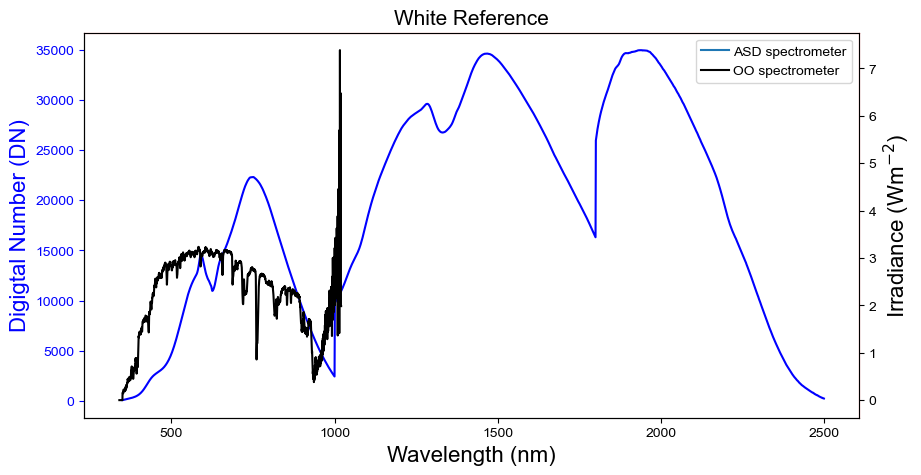

In [76]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12



# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['Wavelength'], df['REM49059000001.asd'], label = 'ASD Spectrometer', color='blue')
ax1 = ax.twinx()
ax1.plot(df2['Wavelength'], df2['Irradiance'], label = 'OO Spectrometer', color='k')
ax.set_xlabel('Wavelength (nm)', fontsize=16)
ax.set_ylabel('Digigtal Number (DN)', fontsize=16, color = 'b')
ax1.set_ylabel('Irradiance (Wm$^{-2}$)', fontsize = 16, color='k')
#plt.title('White Reference', fontsize=16)
ax.spines['right'].set_color('r')
ax.spines['top'].set_color('r')
# Create a single legend for the 2 axes
asd = Line2D([], [], color='C0', markersize=8)
oo = Line2D([], [], color='k', markersize=8)
ax1.legend([asd,oo],['ASD spectrometer','OO spectrometer'],markerscale=1,
           handletextpad=0.3,loc='upper right',fontsize=fs)

ax.set_title('White Reference', size=fs+5)
for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(fs)
ax.tick_params(axis='y',colors='b')
ax1.tick_params(axis='y',colors='k')
#plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

In [39]:
d = df3['REM49059000003.asd']/df['REM49059000001.asd']
d1 = df4['REM49059000002.asd']/df['REM49059000001.asd']
d2 = df5['Irradiance']/df2['Irradiance']
d3 = df6['Irradiance']/df2['Irradiance']

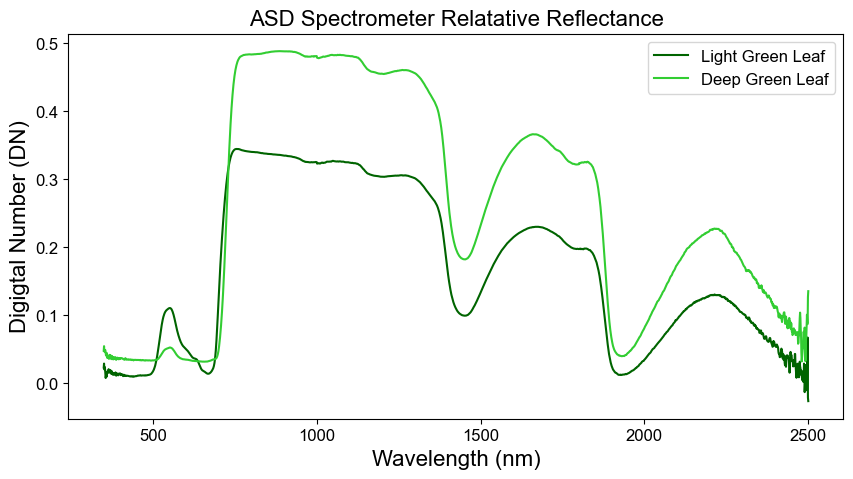

In [26]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12



# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df3['Wavelength'], d, label = 'Light Green Leaf', color='darkgreen')
ax.plot(df4['Wavelength'], d1, label = 'Deep Green Leaf', color='limegreen')
ax.set_xlabel('Wavelength (nm)', fontsize=16)
ax.set_ylabel('Digigtal Number (DN)', fontsize=16, color = 'k')
plt.title('ASD Spectrometer Relatative Reflectance', fontsize=16)
ax.tick_params(axis='y',colors='k')
ax1.tick_params(axis='y',colors='k')
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

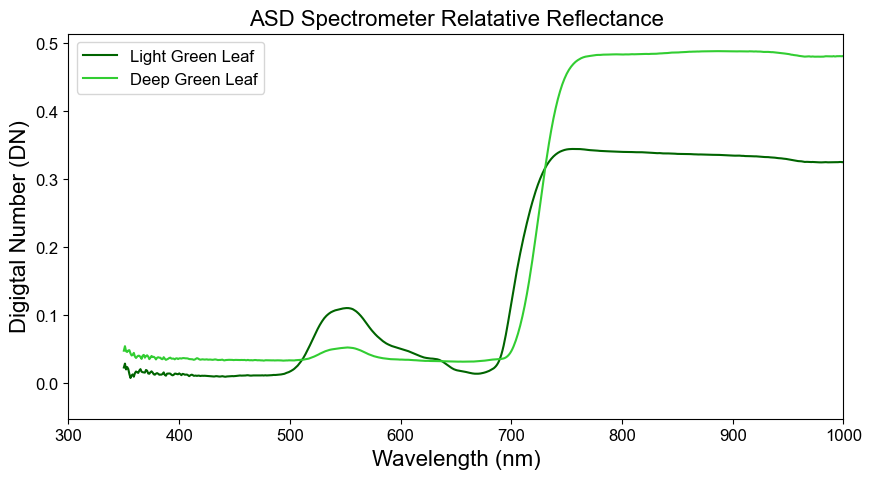

In [44]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12



# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df3['Wavelength'], d, label = 'Light Green Leaf', color='darkgreen')
ax.plot(df4['Wavelength'], d1, label = 'Deep Green Leaf', color='limegreen')
ax.set_xlabel('Wavelength (nm)', fontsize=16)
ax.set_ylabel('Digigtal Number (DN)', fontsize=16, color = 'k')
plt.title('ASD Spectrometer Relatative Reflectance', fontsize=16)
ax.tick_params(axis='y',colors='k')
ax.set_xlim(300,1000)
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

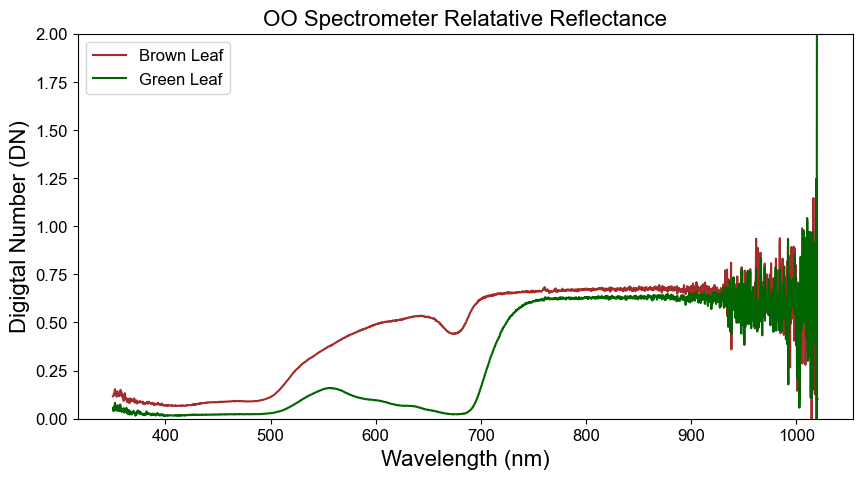

In [41]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12



# Plot the annual zonal mean with latitude on the x-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df5['Wavelength'], d2, label = 'Brown Leaf', color='Brown')
ax.plot(df6['Wavelength'], d3, label = 'Green Leaf', color='darkgreen')
ax.set_xlabel('Wavelength (nm)', fontsize=16)
ax.set_ylabel('Digigtal Number (DN)', fontsize=16, color = 'k')
plt.title('OO Spectrometer Relatative Reflectance', fontsize=16)
ax.tick_params(axis='y',colors='k')
ax.set_ylim(0,2)
plt.legend()
#plt.grid(False, which='major',linestyle='--')
plt.show()

In [52]:
# Specify the wavelengths of the near infrared and red bands
nir = 800
red = 600

def ndvi(nir_val,red_val):
    result = round((nir_val - red_val)/(nir_val + red_val),2)
    return result

# Light green ASD NDVI
nir_idx = (df3['Wavelength']-nir).abs().argsort()[0]
red_idx = (df3['Wavelength']-red).abs().argsort()[0]
lg_ndvi = ndvi(d[nir_idx],d[red_idx])
lg_ndvi

0.74

In [55]:
# Specify the wavelengths of the near infrared and red bands
nir = 800
red = 600

def ndvi(nir_val,red_val):
    result = round((nir_val - red_val)/(nir_val + red_val),2)
    return result

# Light green ASD NDVI
nir_idx = (df3['Wavelength']-nir).abs().argsort()[0]
red_idx = (df3['Wavelength']-red).abs().argsort()[0]
lg_ndvi = ndvi(d[nir_idx],d[red_idx])

# Dark green ASD NDVI
nir_idx = (df4['Wavelength']-nir).abs().argsort()[0]
red_idx = (df4['Wavelength']-red).abs().argsort()[0]
dg_ndvi = ndvi(d1[nir_idx],d1[red_idx])

# Brown OO NDVI
nir_idx = (df5['Wavelength']-nir).abs().argsort()[0]
red_idx = (df5['Wavelength']-red).abs().argsort()[0]
br_ndvi = ndvi(d2[nir_idx],d2[red_idx])

# Green OO NDVI
nir_idx = (df6['Wavelength']-nir).abs().argsort()[0]
red_idx = (df6['Wavelength']-red).abs().argsort()[0]
gr_ndvi = ndvi(d3[nir_idx],d3[red_idx])

print(f'Dark green leaf NDVI (ASD):  {dg_ndvi:.2f}',
      f'Light green leaf NDVI (ASD): {lg_ndvi}','\n',
      f'Green leaf NDVI (OO):        {gr_ndvi}',
      f'Brown leaf NDVI (OO):        {br_ndvi}',sep='\n')

Dark green leaf NDVI (ASD):  0.87
Light green leaf NDVI (ASD): 0.74


Green leaf NDVI (OO):        0.74
Brown leaf NDVI (OO):        0.16


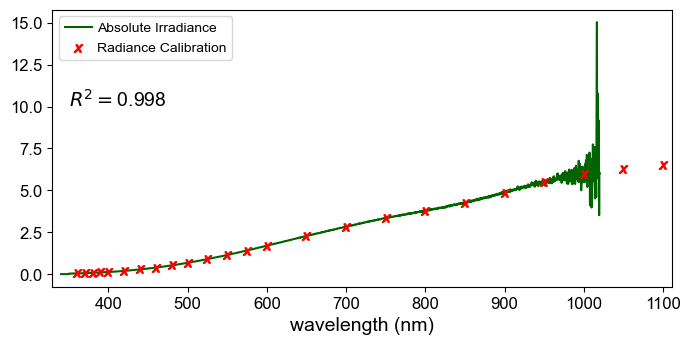

In [77]:
# ----------------- Calculate the correlation between both variables -----------------
# Downsample the irradiance to match the calibration file to calculate correlation
rd_wvlgth = df7.Wavelength.to_numpy()
rd_wvlgth = rd_wvlgth[rd_wvlgth<=1000]
ds_ird = interp1d(df8.Wavelength,df8.Irradiance,kind='nearest')(rd_wvlgth)

# R2 correlation
r2 = (np.corrcoef(ds_ird,df7.Radiance[:-2])[0, 1])**2

# -------------------------------- Make the plot --------------------------------
fig = plt.figure(figsize=(8,3.6))
ax = fig.add_subplot(111)
fs = 10
ax.plot(df8.Wavelength,df8.Irradiance,c='darkgreen',label='Absolute Irradiance')
ax.text(350, 10, r'$R^2 = $'+f'{r2:.3f}',size=fs+4)
ax.scatter(df7.Wavelength,df7.Radiance,zorder=2,marker='$x$',label='Radiance Calibration', color = 'r')
ax.margins(x=0.015),ax.legend(loc='upper left',handletextpad=0.3,fontsize=fs)
ax.set_xlabel('wavelength (nm)',size=fs+4)

plt.savefig('Lab_04_Q_04.png', dpi=200, facecolor='white', edgecolor='none', bbox_inches='tight')